In [1]:
# %%
# Cell 1：載入套件並讀取資料
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# 設定全局字體
plt.rcParams['font.family'] = 'Arial'

# 讀取 CSV 
df = pd.read_csv('VerbalFluencyTest_rawdata.csv')

# 確認前幾筆
df.head()

,NUMBER,Age,Gender,Analysis Result,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency
0,1,63,2,Normal,0.895205,0.684282,0.854517,1.000000,0.940569
1,2,67,2,Dementia,0.563597,0.267195,0.853779,0.653680,0.442837
2,3,69,1,Dementia,0.227932,0.136541,0.317103,0.317103,0.616538
3,4,58,2,Normal,1.000000,0.683591,0.939348,1.000000,0.895420
4,5,72,2,Dementia,0.606681,0.201904,0.407563,0.541407,0.436888


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NUMBER            1010 non-null   int64  
 1   Age               1010 non-null   int64  
 2   Gender            1010 non-null   int64  
 3   Analysis Result   1005 non-null   object 
 4   Verbal Fluency    1005 non-null   float64
 5   Lexical Richness  1005 non-null   float64
 6   Speech Rate       1005 non-null   float64
 7   Accuracy          1005 non-null   float64
 8   Voice Fluency     1005 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 71.1+ KB


,NUMBER,Age,Gender,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency
count,1010.000000,1010.000000,1010.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,505.500000,67.235644,1.749505,0.663690,0.593018,0.704529,0.752119,0.789499
std,291.706188,8.003958,0.433513,0.285560,0.276678,0.274955,0.328662,0.251114
min,1.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,253.250000,62.000000,1.250000,0.530296,0.437287,0.544226,0.562500,0.711655
50%,505.500000,68.000000,2.000000,0.716313,0.688283,0.858512,1.000000,0.851492
75%,757.750000,72.000000,2.000000,0.884467,0.772675,0.877416,1.000000,1.000000
max,1010.000000,94.000000,2.000000,1.000000,1.000000,0.989835,1.000000,1.000000


Analysis Result
Normal          822
Dementia        138
Inconclusive     45
Name: count, dtype: int64

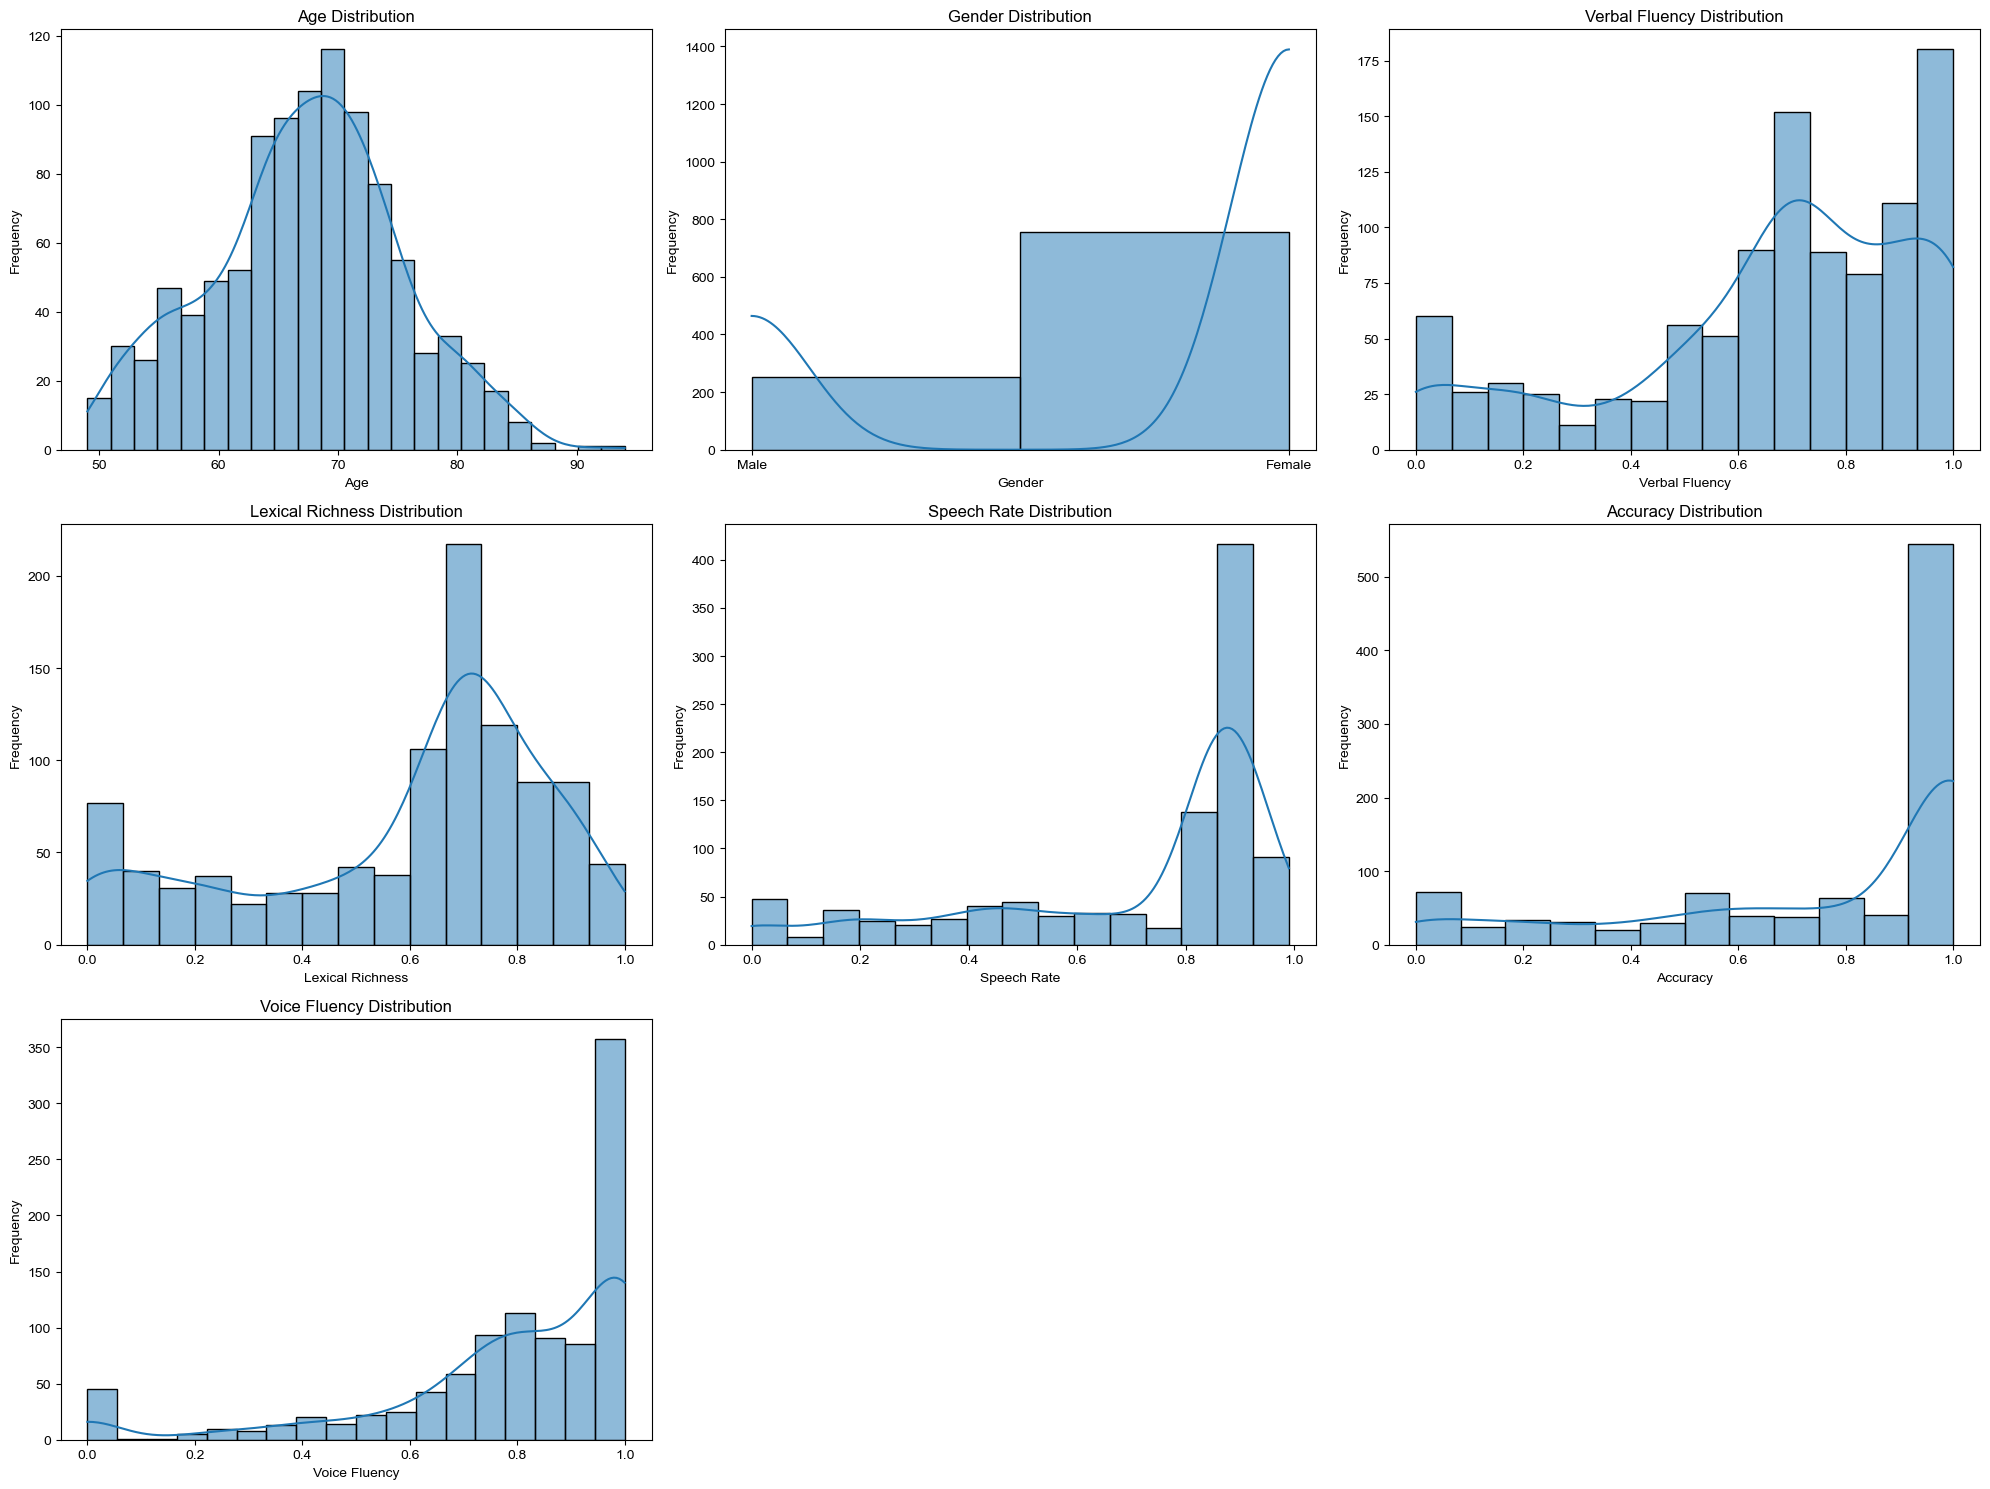

In [7]:
# %%
# 程式碼區塊 2：資料總覽與描述性統計
# 資料欄位與型態
df.info()

# 敘述性統計（數值欄位）
display(df.describe())

# 分類欄位（分析結果）分布
display(df['Analysis Result'].value_counts())

# 各分數欄位列表
numeric_cols = ['Verbal Fluency', 'Lexical Richness', 'Speech Rate', 'Accuracy', 'Voice Fluency']

# 建立一個大圖，包含所有分布圖
plt.figure(figsize=(20, 15))

# 年齡分布
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# 性別分布視覺化
plt.subplot(3, 3, 2)
sns.histplot(data=df, x='Gender', kde=True, bins=2)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks([1, 2], ['Male', 'Female'])

# 各分數分布
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+3)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [4]:
# %%
# 程式碼區塊 3：檢查遺失值與唯一值
# 各欄位缺失值統計
display(df.isnull().sum())

# 各欄位唯一值數量
display(df.nunique())

NUMBER              0
Age                 0
Gender              0
Analysis Result     5
Verbal Fluency      5
Lexical Richness    5
Speech Rate         5
Accuracy            5
Voice Fluency       5
dtype: int64

NUMBER              1010
Age                   41
Gender                 2
Analysis Result        3
Verbal Fluency       768
Lexical Richness     951
Speech Rate          954
Accuracy             125
Voice Fluency        661
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_28224\692813224.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Analysis Result', data=df,


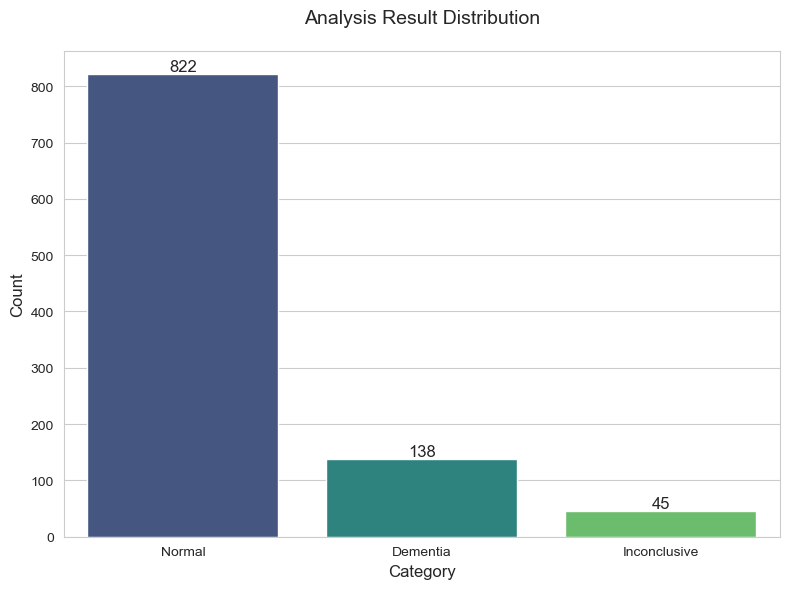

In [9]:
# %%
# 程式碼區塊 4：分析結果分類分布
plt.figure(figsize=(8,6))
sns.countplot(x='Analysis Result', data=df,
              order=df['Analysis Result'].value_counts().index,
              palette='viridis')
plt.title('Analysis Result Distribution', fontsize=14, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 在每個柱狀圖上添加數字標籤
for i, count in enumerate(df['Analysis Result'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# 調整圖表樣式
sns.set_style("white")
plt.tight_layout()
plt.show()

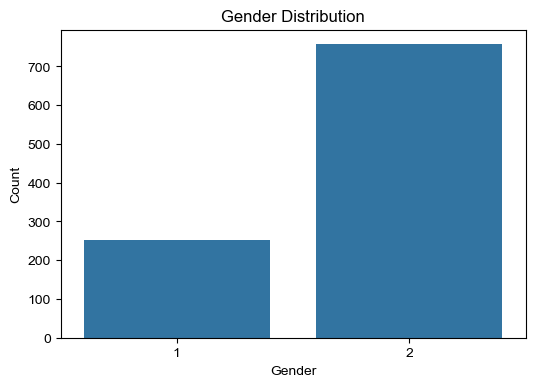

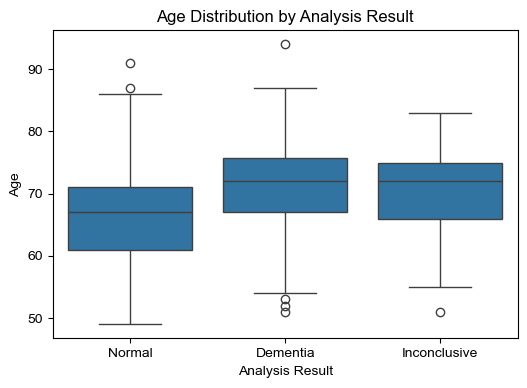

In [6]:
# %%
# 程式碼區塊 5：性別與年齡分布
# 性別分布 (1=男, 2=女)
plt.figure(figsize=(6,4))
gender_mapping = {1: 'Male', 2: 'Female'}
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
# Replace tick labels
plt.xticks([0, 1])
plt.ylabel('Count')
plt.show()

# 依分析結果檢視年齡分布
plt.figure(figsize=(6,4))
result_mapping = {'Normal': 'Normal', 'Dementia': 'Dementia'}
sns.boxplot(x='Analysis Result', y='Age', data=df)
plt.title('Age Distribution by Analysis Result')
plt.xlabel('Analysis Result')
# Update xtick labels if needed
if len(df['Analysis Result'].unique()) == 2:
    plt.xticks([0, 1], ['Normal', 'Dementia'])
plt.ylabel('Age')
plt.show()


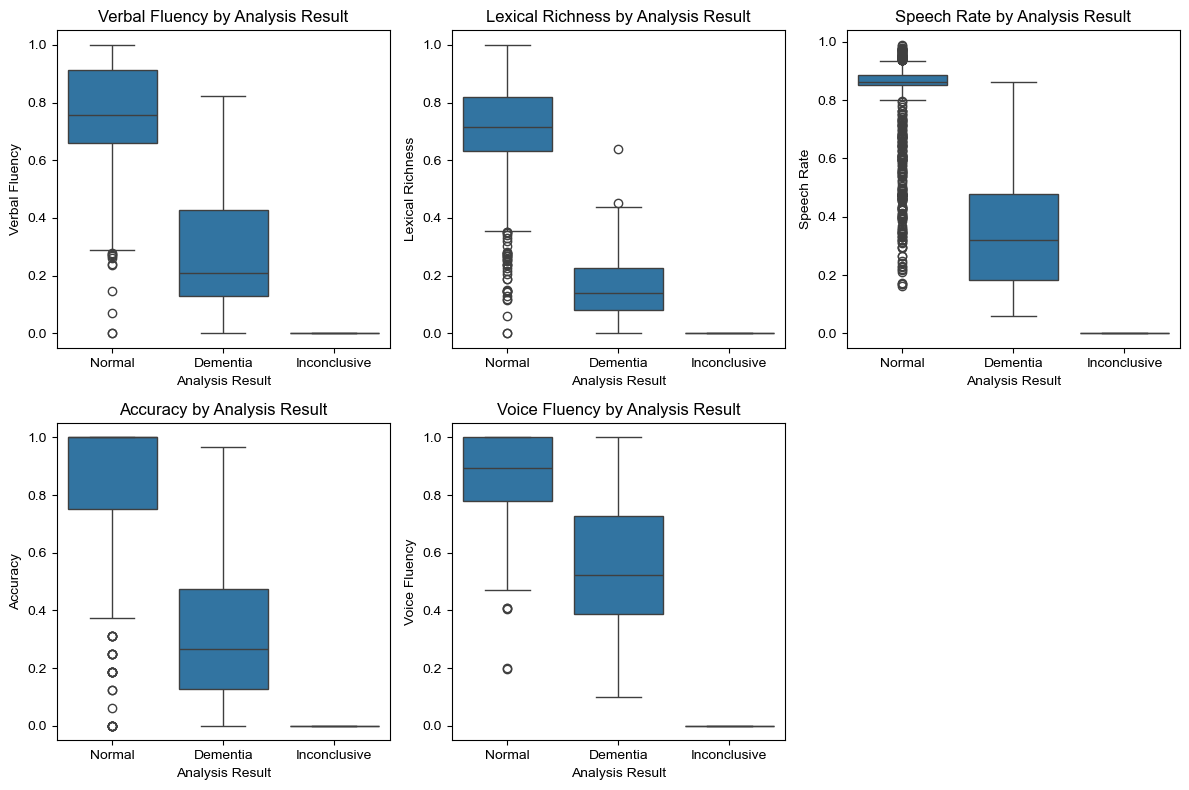

In [8]:
# %%
# 程式碼區塊 6：各分數指標箱型圖（依分析結果）
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Analysis Result', y=col, data=df)
    plt.title(f'{col} by Analysis Result')
    plt.xlabel('Analysis Result')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


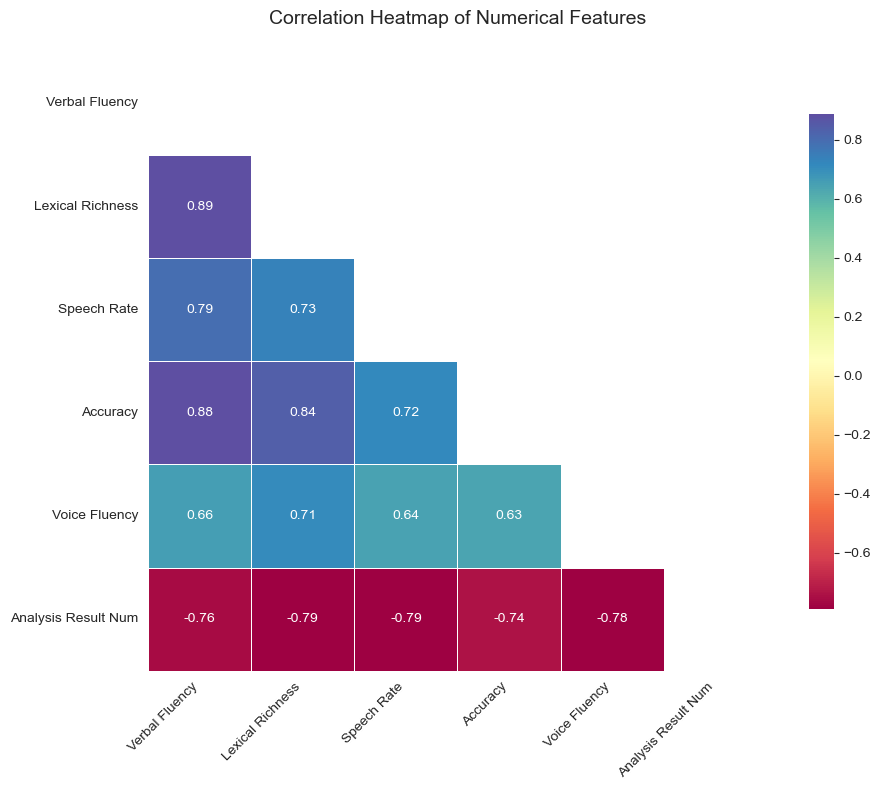

In [13]:
# %%
# 程式碼區塊 7：數值特徵與分析結果相關性熱圖
plt.figure(figsize=(10, 8))

# 將分析結果轉換為數值（Normal=0, Dementia=1, Inconclusive=2）
df['Analysis Result Num'] = df['Analysis Result'].map({'Normal': 0, 'Dementia': 1, 'Inconclusive': 2})

# 計算相關係數矩陣，包含分析結果
corr = df[numeric_cols + ['Analysis Result Num']].corr()

# 建立遮罩：遮住右上角（上三角矩陣）
mask = np.triu(np.ones_like(corr, dtype=bool))

# 繪製熱圖，使用spectral色階
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="Spectral", 
            square=True, linewidths=.5, cbar_kws={"shrink": .8},
            annot_kws={"size": 10})

# 美化標題和標籤
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 調整布局
plt.tight_layout()

# 顯示圖表
plt.show()


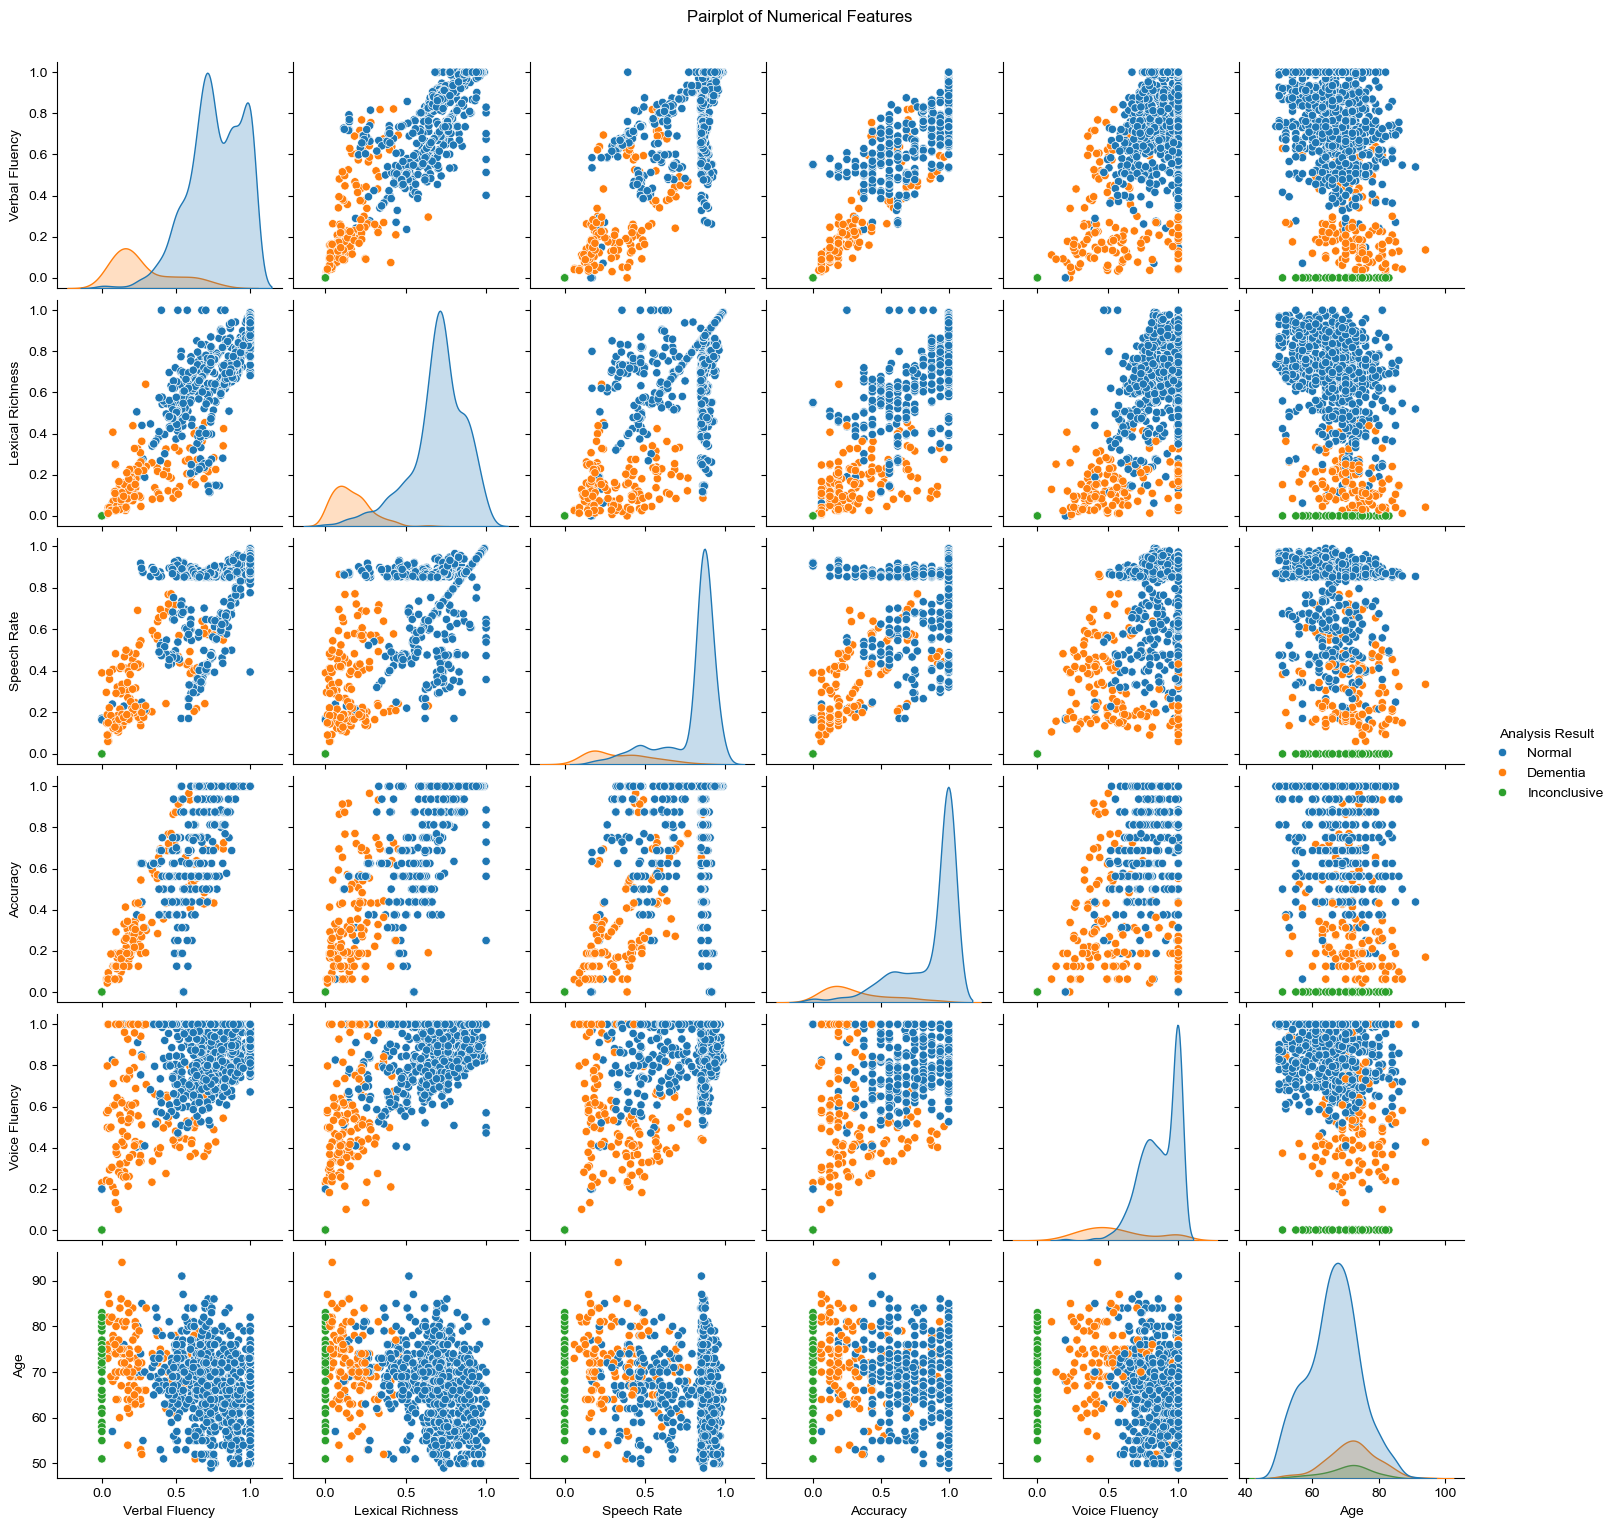

In [16]:
# %%
# 程式碼區塊 8：Pairplot（依分析結果著色）
# 建立包含數值欄位與分析結果的資料
plot_df = df[numeric_cols + ['Age', 'Analysis Result']].copy()

# 繪製 pairplot，依分析結果上色
sns.pairplot(plot_df, hue='Analysis Result', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


In [17]:
# %%
# 程式碼區塊 9：Group Descriptive Statistics by Analysis Result

# Calculate mean statistics by group
group_stats = df.groupby('Analysis Result')[numeric_cols + ['Age']].mean()

# Display the results
print("Group Statistics - Mean Values:")
display(group_stats)

# Additional statistics - standard deviations
group_std = df.groupby('Analysis Result')[numeric_cols + ['Age']].std()

print("\nGroup Statistics - Standard Deviations:")
display(group_std)


Group Statistics - Mean Values:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.280476,0.161006,0.350191,0.330225,0.565985,71.731884
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,70.200000
Normal,0.764358,0.698010,0.802586,0.864122,0.870244,66.287105



Group Statistics - Standard Deviations:


,Verbal Fluency,Lexical Richness,Speech Rate,Accuracy,Voice Fluency,Age
Analysis Result,,,,,,
Dementia,0.208288,0.113773,0.190961,0.240447,0.245432,7.490666
Inconclusive,0.000000,0.000000,0.000000,0.000000,0.000000,7.149698
Normal,0.183050,0.172542,0.168609,0.221278,0.134062,7.838367


缺失值檢查:
Verbal Fluency      5
Lexical Richness    5
Speech Rate         5
Accuracy            5
Voice Fluency       5
dtype: int64

移除缺失值後的資料筆數: 960

分群結果與實際標籤比較:
Cluster            0    1
Analysis Result          
Dementia           3  135
Normal           752   70

需要反轉分群標籤
反轉後的分群結果:
Cluster            0    1
Analysis Result          
Dementia         135    3
Normal            70  752

混淆矩陣:
[[ 70 752]
 [135   3]]

分類報告:
              precision    recall  f1-score   support

           0       0.34      0.09      0.14       822
           1       0.00      0.02      0.01       138

    accuracy                           0.08       960
   macro avg       0.17      0.05      0.07       960
weighted avg       0.29      0.08      0.12       960


輪廓係數: 0.5252

PCA 主成分解釋方差比例: [0.72383403 0.12808865]
累計解釋方差比例: 0.8519

特徵與主成分的關聯:
                       PC1       PC2
Verbal Fluency    0.490551 -0.239917
Lexical Richness  0.486610  0.023833
Speech Rate       0.420624 -0.244118
Accuracy       

c:\Users\user\.conda\envs\frailty\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


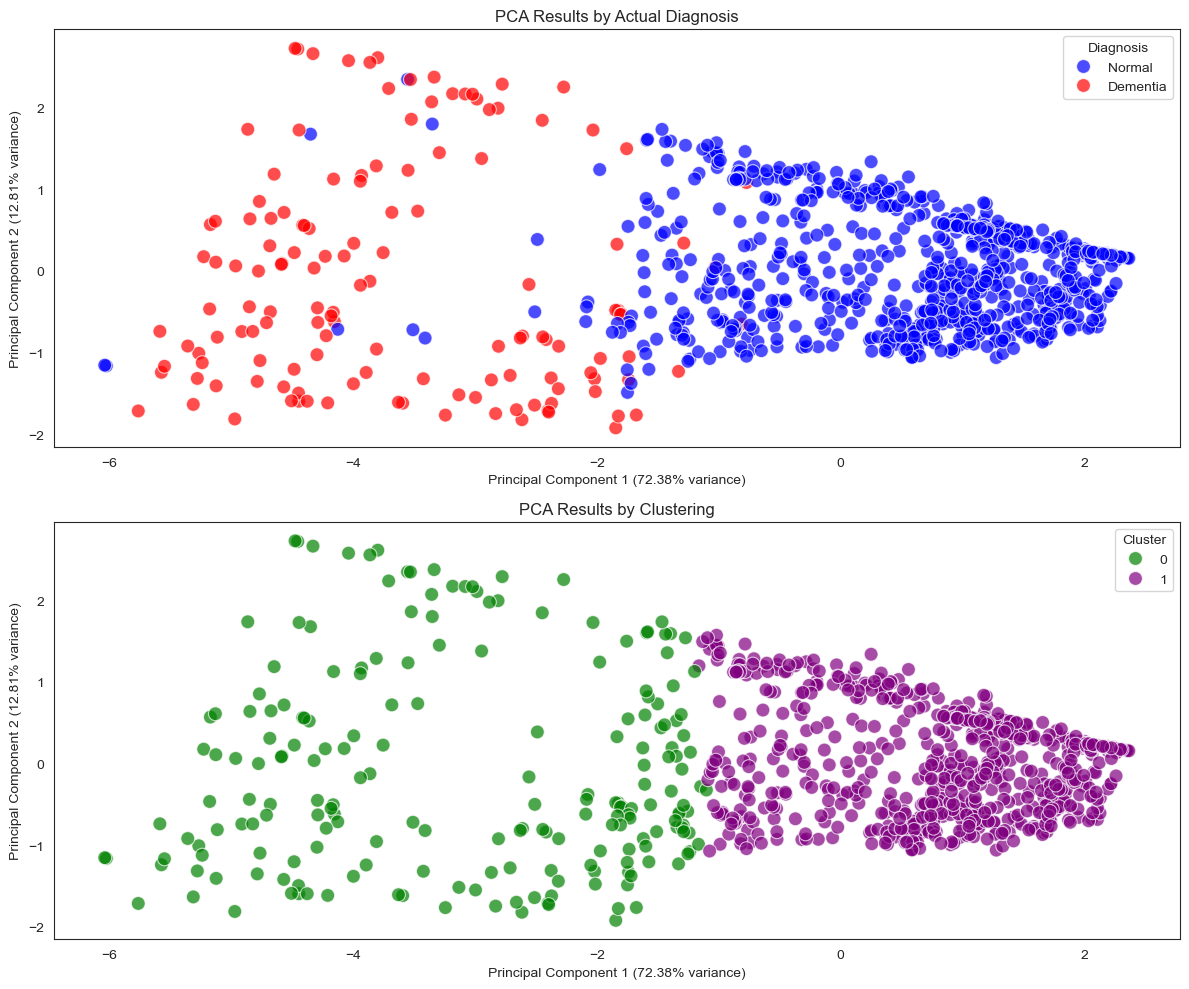

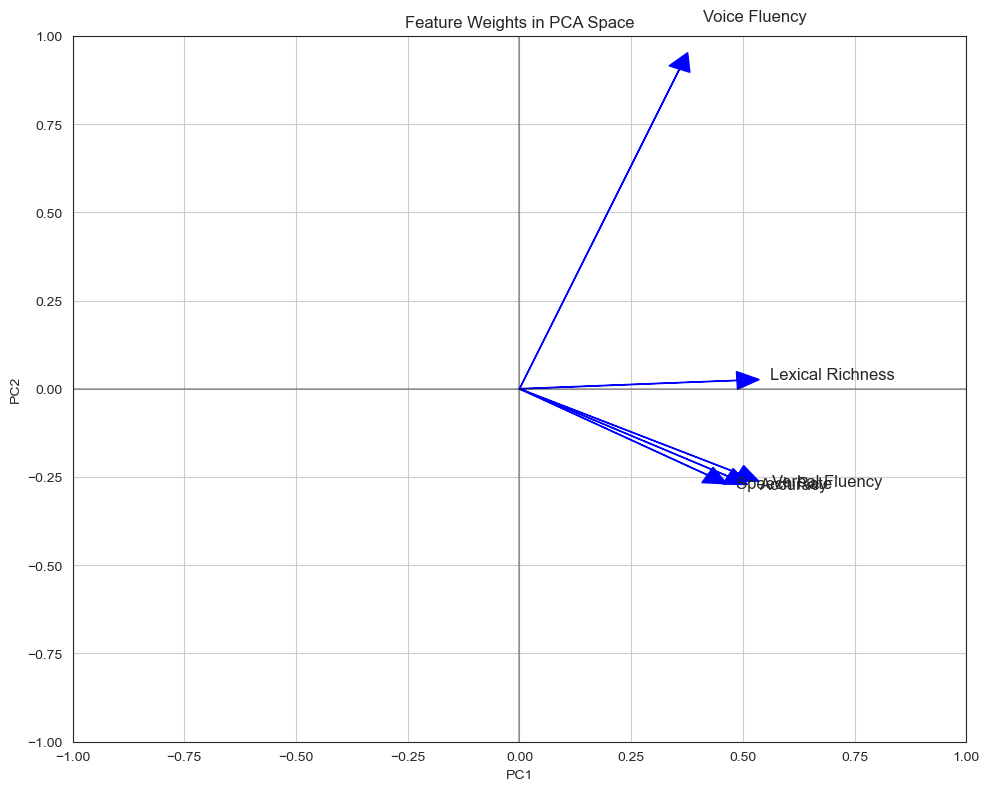

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

# 載入資料
df = pd.read_csv('VerbalFluencyTest_rawdata.csv')

# 排除 Inconclusive 的資料
df_clean = df[df['Analysis Result'] != 'Inconclusive'].copy()

# 確認數值欄位
numeric_cols = ['Verbal Fluency', 'Lexical Richness', 'Speech Rate', 'Accuracy', 'Voice Fluency']

# 檢查並顯示缺失值情況
print("缺失值檢查:")
print(df_clean[numeric_cols].isnull().sum())

# 移除含有缺失值的行
df_clean = df_clean.dropna(subset=numeric_cols)
print(f"\n移除缺失值後的資料筆數: {len(df_clean)}")

# 標準化數值特徵
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[numeric_cols])

# KMeans 分群 (k=2)
kmeans = KMeans(n_clusters=2, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(scaled_features)

# 比較真實標籤與分群結果
cluster_label_counts = pd.crosstab(df_clean['Analysis Result'], df_clean['Cluster'])
print("\n分群結果與實際標籤比較:")
print(cluster_label_counts)

# 檢查是否需要反轉標籤
if (cluster_label_counts.iloc[0, 1] > cluster_label_counts.iloc[0, 0] and 
    cluster_label_counts.iloc[1, 0] > cluster_label_counts.iloc[1, 1]):
    print("\n需要反轉分群標籤")
    df_clean['Cluster'] = 1 - df_clean['Cluster']
    cluster_label_counts = pd.crosstab(df_clean['Analysis Result'], df_clean['Cluster'])
    print("反轉後的分群結果:")
    print(cluster_label_counts)

# 計算混淆矩陣
true_labels = df_clean['Analysis Result'].map({'Normal': 0, 'Dementia': 1})
conf_matrix = confusion_matrix(true_labels, df_clean['Cluster'])
print("\n混淆矩陣:")
print(conf_matrix)

# 計算評估指標
print("\n分類報告:")
print(classification_report(true_labels, df_clean['Cluster']))

# 計算輪廓係數 (Silhouette Score)
silhouette_avg = silhouette_score(scaled_features, df_clean['Cluster'])
print(f"\n輪廓係數: {silhouette_avg:.4f}")

# 使用 PCA 降維至2D
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# 將 PCA 結果添加到數據框中
df_clean['PCA1'] = principal_components[:, 0]
df_clean['PCA2'] = principal_components[:, 1]

# 計算各主成分的解釋方差比例
explained_variance = pca.explained_variance_ratio_
print(f"\nPCA 主成分解釋方差比例: {explained_variance}")
print(f"累計解釋方差比例: {sum(explained_variance):.4f}")

# 計算原始特徵與主成分的關聯
feature_weights = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=numeric_cols
)
print("\n特徵與主成分的關聯:")
print(feature_weights)

# 繪製 PCA 結果散點圖 (依實際診斷結果著色)
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Analysis Result',
    data=df_clean,
    palette=['blue', 'red'],
    s=100,
    alpha=0.7
)
plt.title('PCA Results by Actual Diagnosis')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.legend(title='Diagnosis')

# 繪製 PCA 結果散點圖 (依分群結果著色)
plt.subplot(2, 1, 2)
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster',
    data=df_clean,
    palette=['green', 'purple'],
    s=100,
    alpha=0.7
)
plt.title('PCA Results by Clustering')
plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.2%} variance)')
plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.2%} variance)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

# 繪製特徵在 PCA 空間中的投影
plt.figure(figsize=(10, 8))
for i, feature in enumerate(numeric_cols):
    plt.arrow(
        0, 0, 
        feature_weights.iloc[i, 0], 
        feature_weights.iloc[i, 1],
        head_width=0.05, 
        head_length=0.05, 
        fc='blue', 
        ec='blue'
    )
    plt.text(
        feature_weights.iloc[i, 0] * 1.15, 
        feature_weights.iloc[i, 1] * 1.15, 
        feature, 
        fontsize=12
    )

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.title('Feature Weights in PCA Space')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()